In [2]:
import pandas as pd
from pandas_datareader import data as dr
import os
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pf
from plotly.subplots import make_subplots

In [3]:
# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [4]:
from datetime import datetime,timedelta
u=datetime.today()
i=(str(u.date()))
i


'2023-04-09'

In [5]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import yfinance as yf
a=yf.download('WIPRO.NS',start='2017-1-1')

[*********************100%***********************]  1 of 1 completed


In [7]:
a=a.reset_index()

In [8]:
a.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,178.143799,179.400040,176.437546,176.831299,171.755066,1230474
1,2017-01-03,177.375046,177.787537,174.637543,175.125046,170.097778,1843468
2,2017-01-04,175.125046,179.100037,174.787537,178.350037,173.230179,3025319
3,2017-01-05,178.912537,182.212540,178.912537,180.150040,174.978516,2608498
4,2017-01-06,179.437546,180.037552,175.875046,176.231293,171.172256,4190860


In [9]:
a.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1544,2023-03-29,358.000000,360.750000,355.000000,359.049988,359.049988,4411920
1545,2023-03-31,363.350006,365.750000,361.299988,365.250000,365.250000,3957106
1546,2023-04-03,367.950012,368.399994,365.149994,367.950012,367.950012,2026750
1547,2023-04-05,369.700012,371.899994,367.200012,369.750000,369.750000,3221555
1548,2023-04-06,369.000000,370.450012,365.850006,366.649994,366.649994,3214807


In [10]:
a.shape

(1549, 7)

In [11]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1549 non-null   datetime64[ns]
 1   Open       1549 non-null   float64       
 2   High       1549 non-null   float64       
 3   Low        1549 non-null   float64       
 4   Close      1549 non-null   float64       
 5   Adj Close  1549 non-null   float64       
 6   Volume     1549 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 84.8 KB


In [12]:
a.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# MAKING NWE DATAFRAME FROM DATE AND CLOSE PRICE OF STOCK

In [13]:
df=a[['Date','Close']]

In [14]:
df.head()

,Date,Close
0,2017-01-02,176.831299
1,2017-01-03,175.125046
2,2017-01-04,178.350037
3,2017-01-05,180.150040
4,2017-01-06,176.231293


In [15]:
df.tail()

,Date,Close
1544,2023-03-29,359.049988
1545,2023-03-31,365.250000
1546,2023-04-03,367.950012
1547,2023-04-05,369.750000
1548,2023-04-06,366.649994


In [16]:
df.shape

(1549, 2)

In [17]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [18]:
"""
plt.figure(figsize=(20, 10))
plt.plot(df.Date,df.Close,c='r',label='CLOSE PRICE OF STOCK')
plt.title("DATE AND CLOSE PRICE OF STOCK")
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.legend()
plt.show()
"""

'\nplt.figure(figsize=(20, 10))\nplt.plot(df.Date,df.Close,c=\'r\',label=\'CLOSE PRICE OF STOCK\')\nplt.title("DATE AND CLOSE PRICE OF STOCK")\nplt.xlabel(\'YEAR\')\nplt.ylabel(\'PRICE\')\nplt.legend()\nplt.show()\n'

In [19]:
fig = px.line(df, x=df.Date, y=df.Close)
fig.update_traces(marker_line_width=5, opacity=0.9)
fig.update_layout(title_text='Whole period of timeframe of stock close price 2017-2022', 
                  font_size=15, font_color='black')
fig.show()


In [20]:
#pf.plot(fig,filename='Whole period of timeframe of stock close price 2017-2022')

# min_max

In [21]:
df=a[['Close']]

In [22]:
df.head()

,Close
0,176.831299
1,175.125046
2,178.350037
3,180.150040
4,176.231293


In [23]:
df.tail()

,Close
1544,359.049988
1545,365.250000
1546,367.950012
1547,369.750000
1548,366.649994


In [24]:
df.shape

(1549, 1)

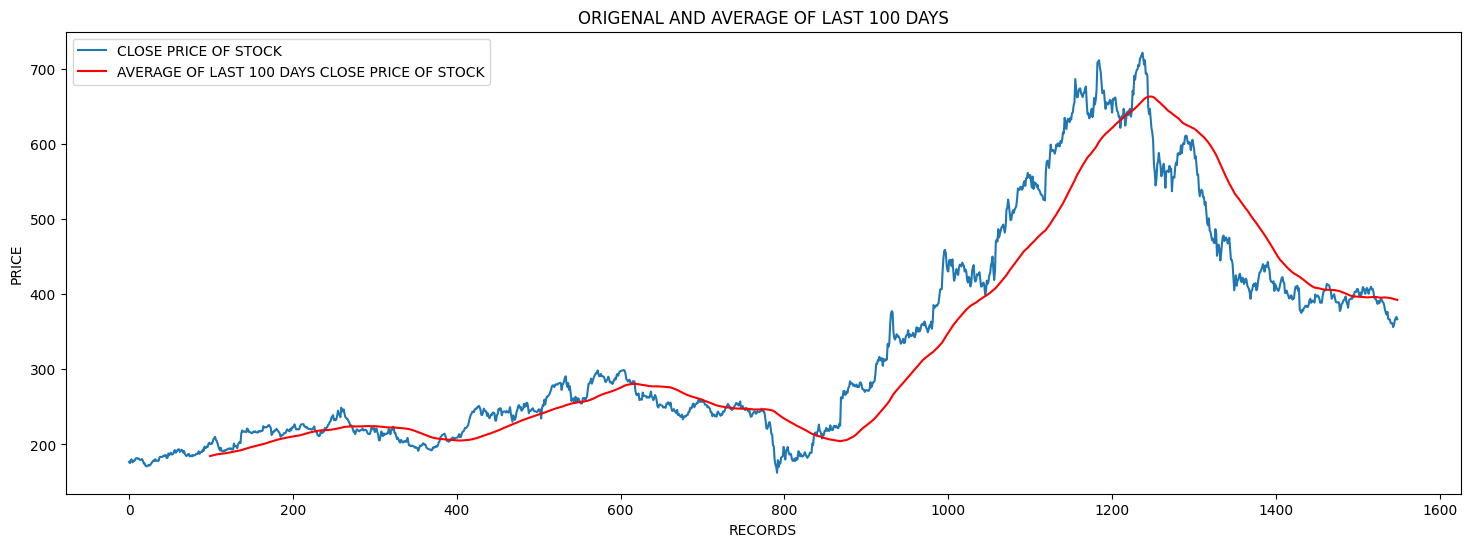

In [25]:
ma100 = df.Close.rolling(100).mean()
plt.figure(figsize = (18,6))
plt.plot(df.Close,label='CLOSE PRICE OF STOCK')
plt.plot(ma100, 'r',label='AVERAGE OF LAST 100 DAYS CLOSE PRICE OF STOCK')
plt.title("ORIGENAL AND AVERAGE OF LAST 100 DAYS")
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

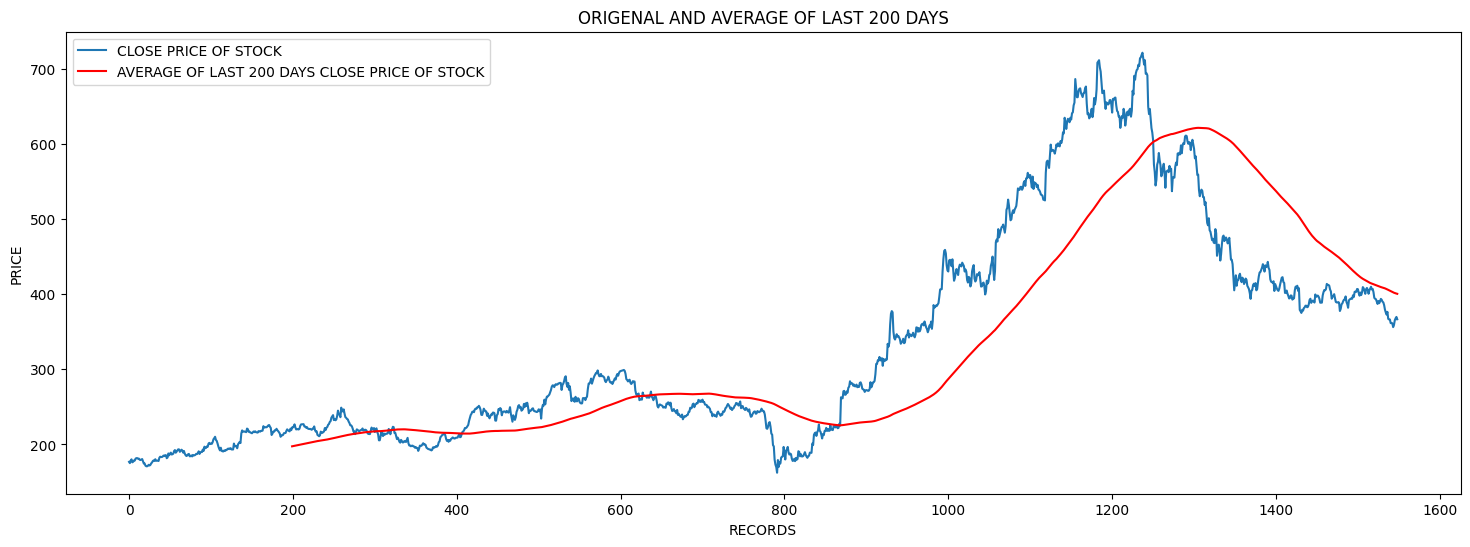

In [26]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize = (18,6))
plt.plot(df.Close,label='CLOSE PRICE OF STOCK')
plt.plot(ma200, 'r',label='AVERAGE OF LAST 200 DAYS CLOSE PRICE OF STOCK')
plt.title("ORIGENAL AND AVERAGE OF LAST 200 DAYS")
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

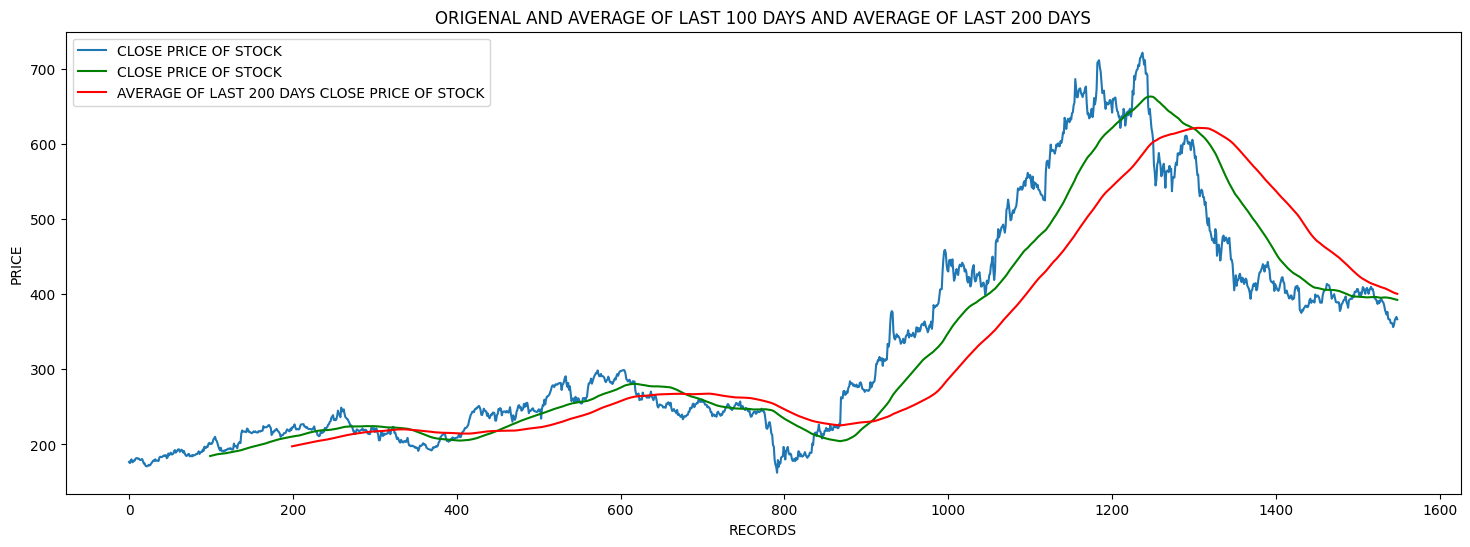

In [27]:
plt.figure(figsize = (18,6))
plt.plot(df.Close,label='CLOSE PRICE OF STOCK')
plt.plot(ma100, 'g',label='CLOSE PRICE OF STOCK')
plt.plot(ma200, 'r',label='AVERAGE OF LAST 200 DAYS CLOSE PRICE OF STOCK')
plt.title("ORIGENAL AND AVERAGE OF LAST 100 DAYS AND AVERAGE OF LAST 200 DAYS")
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [28]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(1549, 1)


# we keep the training set as 70% and 30% testing set

In [29]:
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1084, 1)
test_data:  (465, 1)


In [30]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [31]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [32]:
X_train.shape

(1073, 10)

In [33]:
y_train.shape

(1073,)

In [34]:
y_test.shape

(454,)

# reshape input to be [samples, time steps, features] which is required for LSTM

In [35]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)

X_train =  (1073, 10, 1)
X_test =  (454, 10, 1)


# Create the Stacked LSTM model

In [36]:
model=Sequential()
model.add(LSTM(30,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 30)            3840      
                                                                 
 lstm_1 (LSTM)               (None, 10, 30)            7320      
                                                                 
 lstm_2 (LSTM)               (None, 10)                1640      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 12,811
Trainable params: 12,811
Non-trainable params: 0
_________________________________________________________________


In [37]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=50,verbose=1)

Epoch 1/300
22/22 [==============================] - 8s 103ms/step - loss: 0.0143 - val_loss: 0.0226
Epoch 2/300
22/22 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0076
Epoch 3/300
22/22 [==============================] - 0s 21ms/step - loss: 5.6720e-04 - val_loss: 0.0018
Epoch 4/300
22/22 [==============================] - 1s 33ms/step - loss: 4.8883e-04 - val_loss: 0.0024
Epoch 5/300
22/22 [==============================] - 1s 24ms/step - loss: 4.5519e-04 - val_loss: 0.0034
Epoch 6/300
22/22 [==============================] - 1s 25ms/step - loss: 4.2526e-04 - val_loss: 0.0020
Epoch 7/300
22/22 [==============================] - 1s 25ms/step - loss: 4.1414e-04 - val_loss: 0.0024
Epoch 8/300
22/22 [==============================] - 1s 31ms/step - loss: 4.1637e-04 - val_loss: 0.0019
Epoch 9/300
22/22 [==============================] - 1s 31ms/step - loss: 4.0753e-04 - val_loss: 0.0019
Epoch 10/300
22/22 [==============================] - 1s 26ms/step - lo

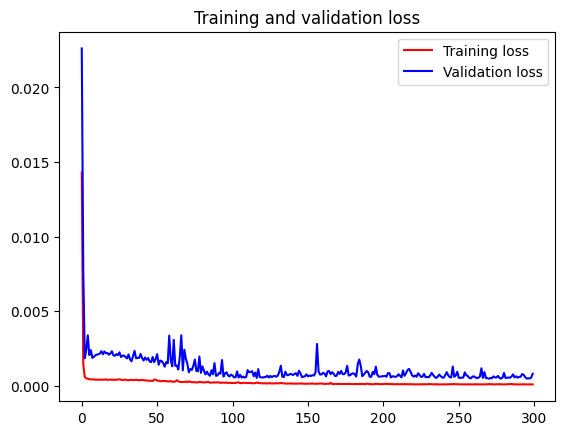

<Figure size 640x480 with 0 Axes>

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

# Lets Do the prediction and check performance metrics

In [39]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

15/15 [==============================] - 0s 4ms/step


In [40]:
train_predict.shape, test_predict.shape

((1073, 1), (454, 1))

In [41]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [43]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9952317369237678
Test data R2 score: 0.9794884763747141


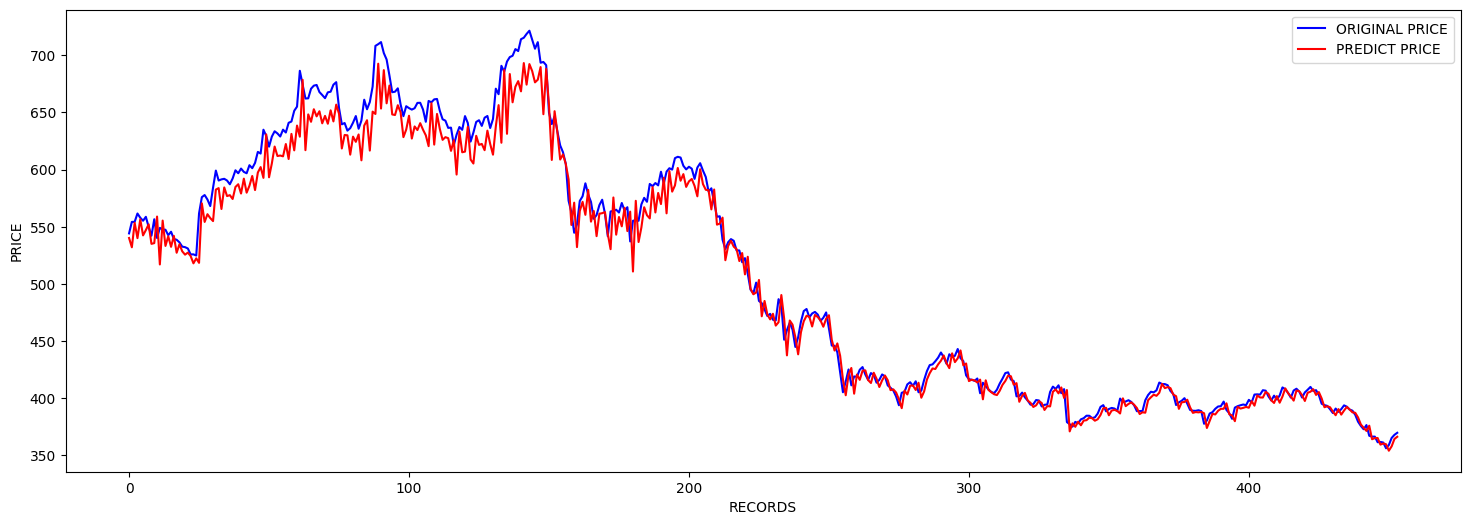

In [44]:
plt.figure(figsize = (18,6))
plt.plot(original_ytest,c='b',label='ORIGINAL PRICE')
plt.plot(test_predict,c='r',label='PREDICT PRICE')
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

# Calculate RMSE performance metrics

In [45]:
math.sqrt(mean_squared_error(y_train,train_predict))

265.5779864368381

In [46]:
math.sqrt(mean_squared_error(y_test,test_predict))

511.15691551852177

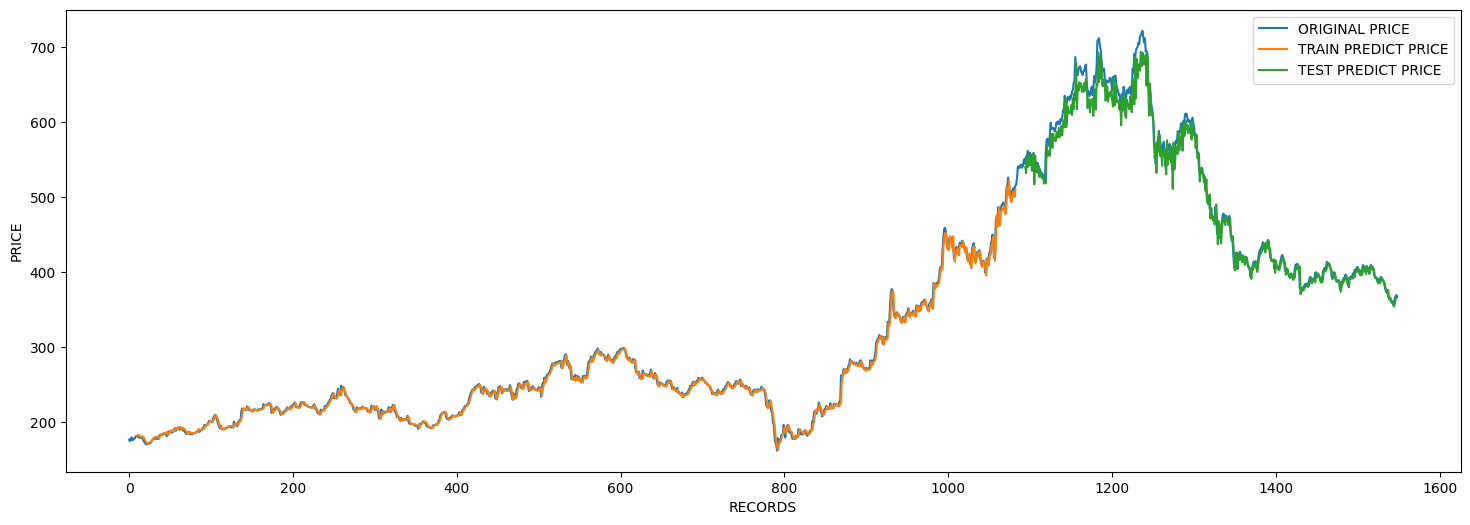

In [50]:
import numpy
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize = (18,6))
plt.plot(scaler.inverse_transform(df),label='ORIGINAL PRICE')
plt.plot(trainPredictPlot,label='TRAIN PREDICT PRICE')
plt.plot(testPredictPlot,label='TEST PREDICT PRICE')
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [51]:
x=(len(test_data)-100)
print(len(test_data))
print(x)

465
365


In [52]:
x_input=test_data[x:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
n=int(input("ENTER HOW MANY DAY DO YOU WANT PREDICT"))
print("PREDICT {0} DAYS STOCK PRICE".format(n))

ENTER HOW MANY DAY DO YOU WANT PREDICT15
PREDICT 15 DAYS STOCK PRICE


In [55]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<n):
    
    if(len(temp_input)>100):
        #print(temp_input)
        #temp_input=temp_input+1
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.36970472]
101
1 day input [0.41992308 0.42189036 0.41920772 0.41402129 0.40472143 0.40498969
 0.40490029 0.42189036 0.43002769 0.43512473 0.43423051 0.43736026
 0.44952161 0.44719662 0.44710722 0.44531879 0.43628719 0.43163732
 0.41437894 0.41849236 0.42099615 0.42510951 0.41643568 0.40668872
 0.4054368  0.405258   0.40624161 0.40490029 0.38504872 0.39014575
 0.40105518 0.40320126 0.40847715 0.412054   0.41259051 0.41974423
 0.40659932 0.40159168 0.39282839 0.41035497 0.41259051 0.41402129
 0.41518375 0.41411069 0.42251632 0.41849236 0.43074311 0.43110076
 0.43065365 0.43753912 0.43682376 0.42779216 0.42153266 0.42904408
 0.42296343 0.42931233 0.44192079 0.43914869 0.4333363  0.42591433
 0.43709201 0.43986405 0.43539298 0.42609318 0.43414111 0.43825448
 0.44272555 0.43628719 0.43762852 0.42993829 0.41634622 0.41420014
 0.41303762 0.40776179 0.40185994 0.40883485 0.40364837 0.40794064
 0.41384243 0.41178575 0.40731468 0.40552625 0.3989985  0.38826792
 0.38165071 0.37646428 0.38299203

In [ ]:
"""
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<n):
    
    if(len(temp_input)>100):
        #print(temp_input)
        #temp_input=temp_input+1
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        yhat=round(yhat)
        lst_output.extend((yhat).tolist())
        i=i+1
    

print(lst_output)
"""

In [57]:
y=(11+n)
y

26

In [58]:
day_new=np.arange(1,11)
day_pred=np.arange(11,y)

In [59]:
z=(len(df) - 10)
z

1539

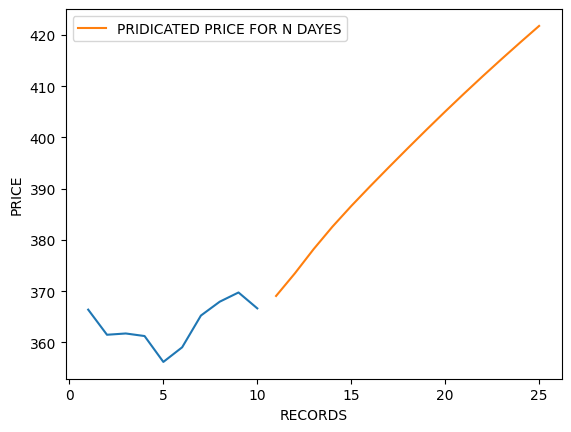

In [60]:
plt.plot(day_new,scaler.inverse_transform(df[z:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='PRIDICATED PRICE FOR N DAYES')
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

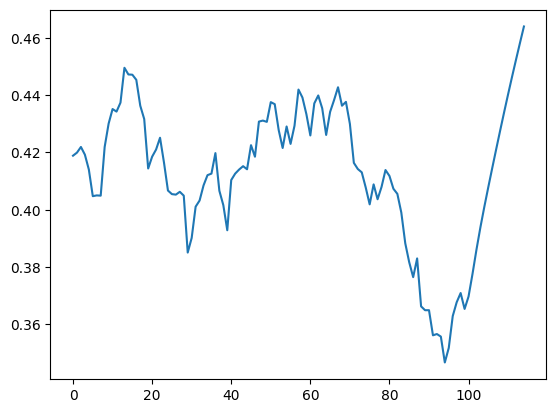

In [61]:
df3=df.tolist()
df3.extend(lst_output)
df.shape
s=(list(df.shape))
d=s[0]
d=(d-100)
plt.plot(df3[d:])

In [62]:
df3=scaler.inverse_transform(df3).tolist()

In [63]:
close=[]
for i in range (len(df3)):
  close.append(round(df3[i][0],6))

In [64]:
close

[176.831299,
 175.125046,
 178.350037,
 180.15004,
 176.231293,
 177.000046,
 178.687546,
 178.575043,
 181.200043,
 181.74379,
 181.781296,
 180.90004,
 181.106293,
 179.625046,
 179.21254,
 179.906296,
 180.562546,
 177.637543,
 174.581299,
 174.656296,
 171.750046,
 171.000046,
 170.86879,
 171.656296,
 172.912537,
 171.956299,
 172.687546,
 174.750046,
 175.968796,
 177.918793,
 178.762543,
 178.012543,
 180.300049,
 178.256287,
 178.36879,
 178.425049,
 177.937546,
 182.287552,
 183.656296,
 183.300049,
 183.206299,
 183.825043,
 185.193802,
 184.46254,
 185.68129,
 185.662552,
 181.687546,
 182.643799,
 188.006302,
 185.550049,
 187.706299,
 189.093796,
 186.562546,
 186.99379,
 187.706299,
 191.250046,
 192.468796,
 189.000046,
 190.331299,
 192.093796,
 193.481293,
 193.387543,
 190.162552,
 191.49379,
 193.012543,
 191.96254,
 189.15004,
 191.30629,
 187.781296,
 185.77504,
 184.612549,
 185.250046,
 186.843796,
 187.406296,
 184.218796,
 184.331299,
 185.362549,
 184.068802,


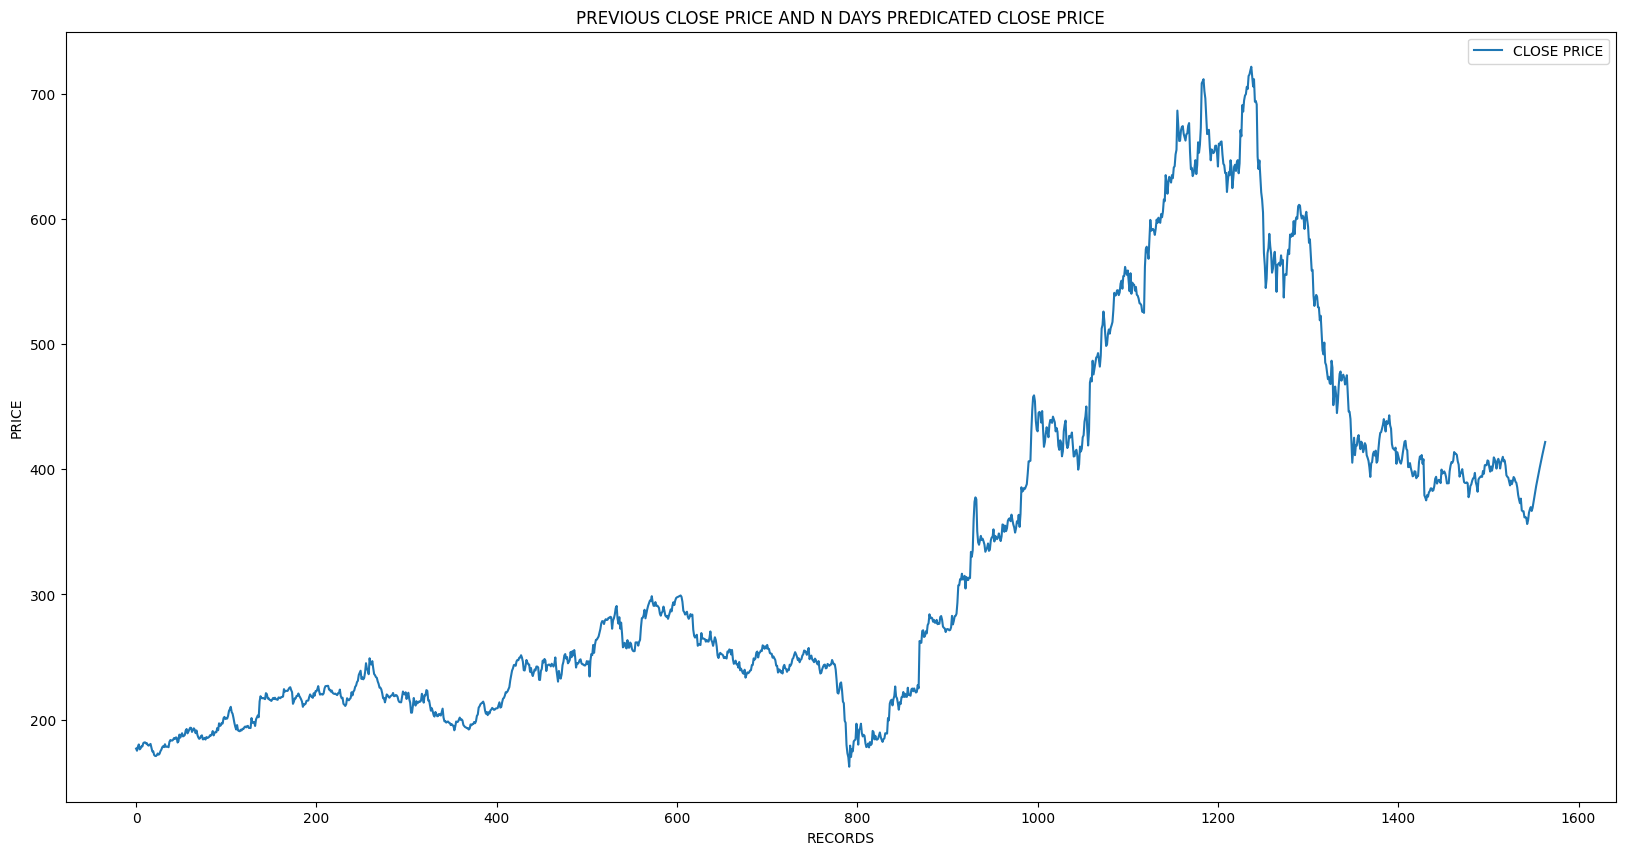

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(df3,label='CLOSE PRICE')
plt.title("PREVIOUS CLOSE PRICE AND N DAYS PREDICATED CLOSE PRICE")
plt.xlabel('RECORDS')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [66]:
type(a)

pandas.core.frame.DataFrame

In [67]:
Date=[]

for i in range(len(a['Date'])):
  Date.append(a['Date'][i])
  
    

In [68]:
nm=(len(a['Date'])-1)

In [69]:
for i in range(n):
  Date.append((a['Date'][nm]) + timedelta(days=i+1))
  
  

In [70]:
ds={'Close':close,'Date':Date}

In [71]:
df4=pd.DataFrame(ds)

In [72]:
df4.head()

,Close,Date
0,176.831299,2017-01-02
1,175.125046,2017-01-03
2,178.350037,2017-01-04
3,180.150040,2017-01-05
4,176.231293,2017-01-06


In [73]:
df4.shape

(1564, 2)

In [74]:
pd.set_option('display.max_rows', None)

In [75]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   1564 non-null   float64       
 1   Date    1564 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.6 KB


In [76]:
fig = px.line(df4, x=df4.Date, y=df4.Close)
fig.update_traces(marker_line_width=5, opacity=0.9)
fig.update_layout(title_text='WHOLE PERIOD OF TIMEFRAME OF STOCK CLOSE PRICE', 
                  font_size=15, font_color='black')
fig.show()

In [77]:
df4.tail(n+5)

,Close,Date
1544,359.049988,2023-03-29
1545,365.250000,2023-03-31
1546,367.950012,2023-04-03
1547,369.750000,2023-04-05
1548,366.649994,2023-04-06
1549,369.070400,2023-04-07
1550,373.479519,2023-04-08
1551,378.213436,2023-04-09
1552,382.587611,2023-04-10
1553,386.613226,2023-04-11


In [ ]:
# add